## Problem Statement:

Perform EDA and derive Insights from the CAR DETAILS dataset using Various Data Analysis and Data Visualization libraries of Python such as Pandas, Matplotlib & Seaborn.

Create and Deploy a ML Model Which can be accessed by all, using Streamlit and GitHub.

# Actionables:

1. Explore the Data using Excel. understand the data and prepare a short summary about the data set in the PPT.


2. Download the CAR DETAILS dataset and perform Data cleaning and Data Pre-Processing if Necessary.


3. Use the various methods such as Handling null values, One-HotEncoding, Imputation and Scaling of Data Pre-Processing where necessary.


4. Perform Exploratory data analysis(EDA) on the Data and perform Graphical Analysis on the Data. Include the graphs with conclusions from the Graphical Analysis.


5. Prepare the Data for Machine Learning modeling.


6. Apply various Machine Learning techniques such as Regression or classification, Bagging, Ensemble techniques and find out the best model using various Machine Learning model evaluation metrics.


7. Save the best model and Load the model.


8. Take the original data set and make another data set by randomly picking 20 data points from the CAR DETAILS data set and apply the saved model on the same Data set and test the model.


9. Make a GitHub Account by visiting the GitHub Website. Create a repository named Data Science Capstone Project and upload the model with the dataset, codefile.


10. Create a Streamlit Account by visiting the Streamlit Website. Connect your GitHub account with streamlit.


11. Create an app.py file and other dependencies files for Streamlit app to be deployed on Streamlit Cloud. Make a simple website and deploy your ML model on Streamlit, Make the website public.


12. Share the Streamlit website and GitHub repository links in the Project PPT.

#### Importing Basic Libraries

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

#### Read the CAR DETAILS Dataset

In [56]:
cars = pd.read_csv("CAR DETAILS 1.csv")
cars.head()

,name,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner


#### Check Shape

In [57]:
cars.shape
# num of row = 4340, num of column = 9

(4340, 9)

### Data Preprocessing

#### Check the columns name

In [58]:
cars.columns

Index(['name', 'brand', 'year', 'selling_price', 'km_driven', 'fuel',
       'seller_type', 'transmission', 'owner'],
      dtype='object')

#### Check the information about datase

In [59]:
#info contains - columns name, null value details, data types 
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   brand          4340 non-null   object
 2   year           4340 non-null   int64 
 3   selling_price  4340 non-null   int64 
 4   km_driven      4340 non-null   int64 
 5   fuel           4340 non-null   object
 6   seller_type    4340 non-null   object
 7   transmission   4340 non-null   object
 8   owner          4340 non-null   object
dtypes: int64(3), object(6)
memory usage: 305.3+ KB


#### Check the Duplicate Values

In [60]:
cars.duplicated().sum()  

763

#### Drop the Duplicate values

In [61]:
cars.drop_duplicates(inplace=True) 

#### Check Shape

In [62]:
cars.shape

(3577, 9)

#### Drop the "name" column

In [64]:
cars.drop(['name'],inplace=True,axis=1)  

#### calculating statistical data of Numeric Columns

In [67]:
cars.describe()

,year,selling_price,km_driven
count,3577.000000,3.577000e+03,3577.000000
mean,2012.962538,4.739125e+05,69250.545709
std,4.251759,5.093018e+05,47579.940016
min,1992.000000,2.000000e+04,1.000000
25%,2010.000000,2.000000e+05,36000.000000
50%,2013.000000,3.500000e+05,60000.000000
75%,2016.000000,6.000000e+05,90000.000000
max,2020.000000,8.900000e+06,806599.000000


#### Removing Outliers and Reset Index

In [68]:
cars[cars['selling_price']>6e6]

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner
89,Mercedes-Benz,2017,8150000,6500,Diesel,Dealer,Automatic,First Owner
3872,Audi,2016,8900000,13000,Petrol,Dealer,Automatic,First Owner


In [69]:
cars=cars[cars['selling_price']<6e6].reset_index(drop=True)

In [70]:
cars

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
3570,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
3571,Hyundai,2014,409999,80000,Diesel,Individual,Manual,Second Owner
3572,Maruti,2009,110000,83000,Petrol,Individual,Manual,Second Owner
3573,Hyundai,2016,865000,90000,Diesel,Individual,Manual,First Owner


#### Saving clean dataset

In [71]:
cars.to_csv('cleaned_car.csv')

In [72]:
cars.columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

#### Cheking null values

In [73]:
cars.isnull().sum()

brand            0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

#### Analysisng unique value counts for each columns

In [74]:
columns = cars.columns
columns

Index(['brand', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner'],
      dtype='object')

In [75]:
for column in cars.columns:
    print(cars[column].value_counts())
    print(("*"*20))

Maruti           1072
Hyundai           637
Mahindra          328
Tata              308
Ford              220
Honda             216
Toyota            170
Chevrolet         151
Renault           110
Volkswagen         93
Nissan             52
Skoda              49
Fiat               32
Audi               30
Datsun             29
BMW                25
Mercedes-Benz      20
Jaguar              5
Mitsubishi          5
Land                5
Volvo               4
Jeep                3
Ambassador          3
MG                  2
OpelCorsa           2
Daewoo              1
Force               1
Isuzu               1
Kia                 1
Name: brand, dtype: int64
********************
2017    345
2012    338
2015    332
2014    321
2013    298
2018    295
2016    282
2011    247
2010    210
2009    169
2019    162
2008    129
2007    117
2006     93
2005     61
2020     45
2004     38
2003     22
2002     18
2001     16
2000     12
1998      9
1999      9
1997      3
1996      2
1995      1
199

### Exploratory data analysis (EDA)



#### Depict count of top 7 Brand on countplot

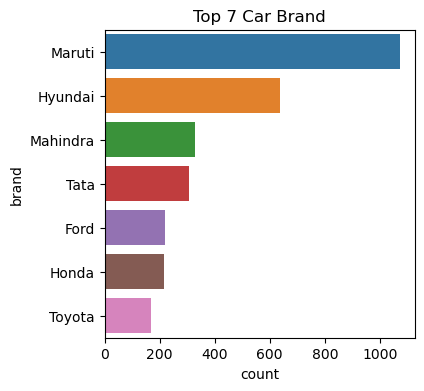

In [76]:
plt.figure(figsize=(4,4))
sns.countplot(y=cars['brand'],order=cars['brand'].value_counts().sort_values(ascending=False)[:7].index)
plt.title('Top 7 Car Brand')
plt.show()

#### Inference

1) The most car used is Maruti


#### Depict count of top 5 car on countplot

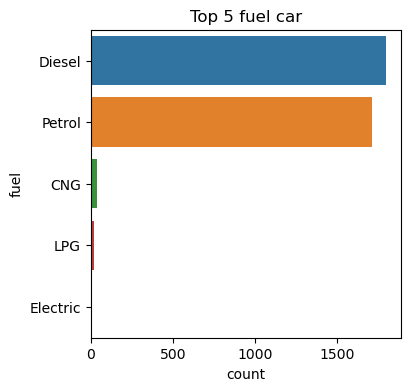

In [77]:
plt.figure(figsize=(4,4))
sns.countplot(y=cars['fuel'],order=cars['fuel'].value_counts().sort_values(ascending=False)[:5].index)
plt.title('Top 5 fuel car')
plt.show()

#### Inference

1) The most fuel used is Diesel.


#### Boxplot of brand name with selling price

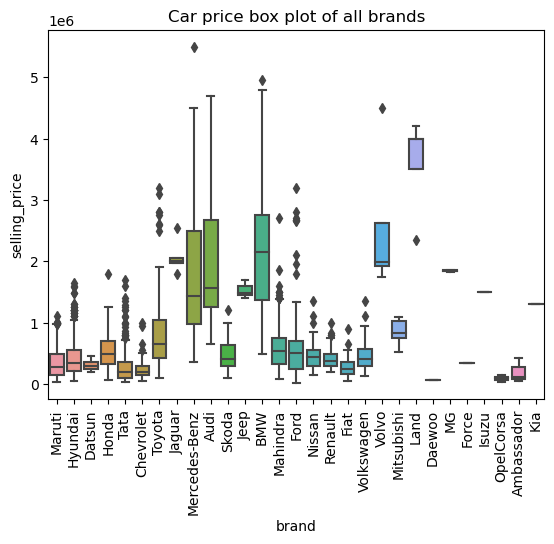

In [78]:
sns.boxplot(x=cars['brand'],y=cars['selling_price'])
plt.xticks(rotation=90)
plt.title("Car price box plot of all brands")
plt.show()

#### correlation

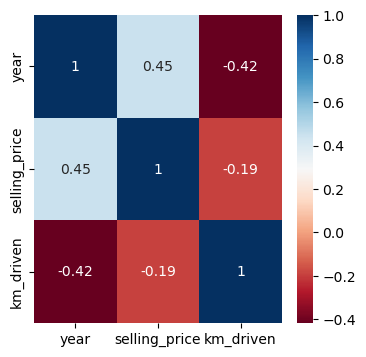

In [79]:
plt.figure(figsize=(4,4))
corr=cars.corr()
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

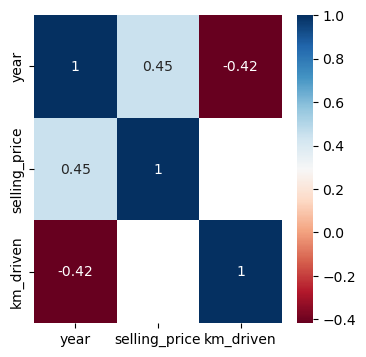

In [80]:
plt.figure(figsize=(4,4))
corr=cars.corr()
sns.heatmap(corr[abs(corr)>0.4],annot=True,cmap='RdBu')
plt.show()

#### Distribution of plots of selling price

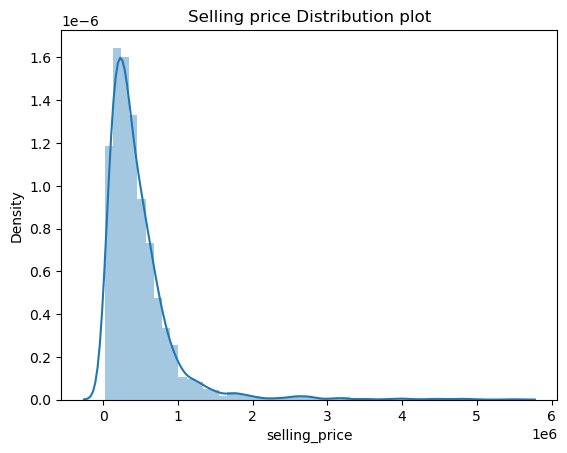

In [81]:
sns.distplot(cars['selling_price'])
plt.title("Selling price Distribution plot")
plt.show()

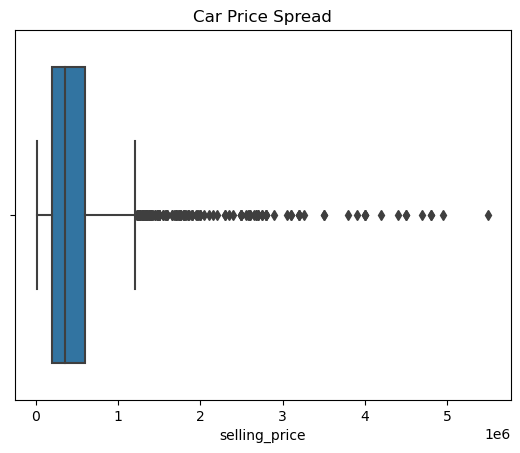

In [82]:
sns.boxplot(cars['selling_price'])
plt.title('Car Price Spread')
plt.show()

In [83]:
cars1=cars['year'].value_counts().sort_values(ascending=False)[:7]
cars1

2017    345
2012    338
2015    332
2014    321
2013    298
2018    295
2016    282
Name: year, dtype: int64

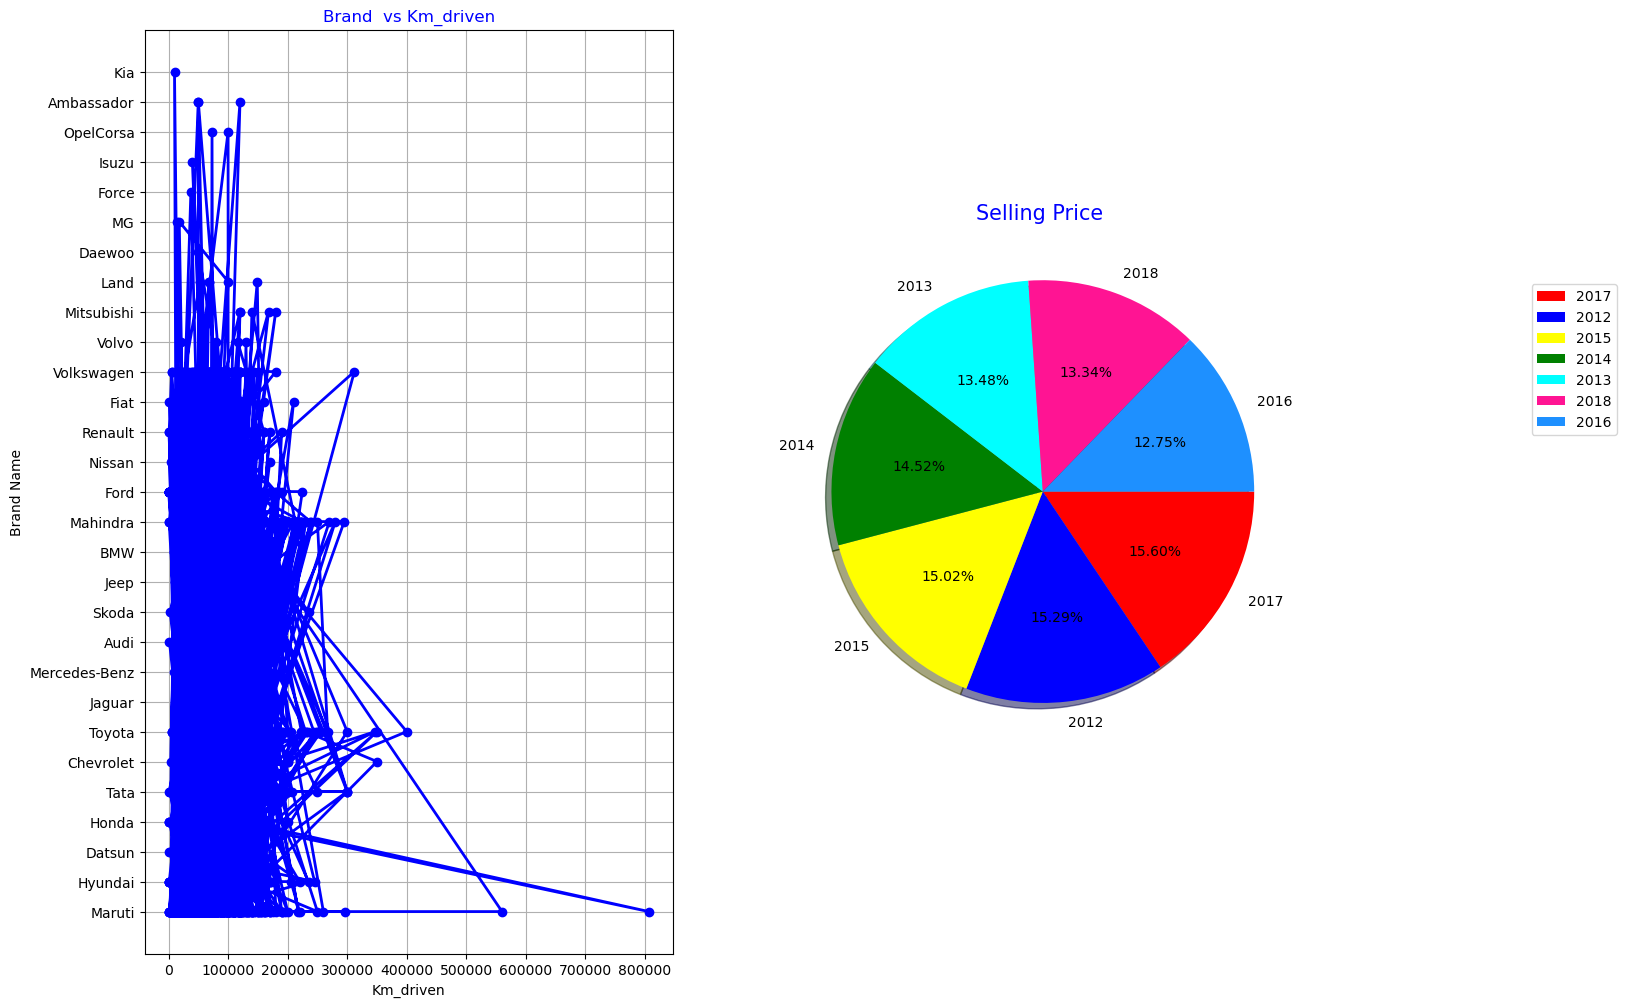

In [85]:
fig,(ax2,ax3)=plt.subplots(1,2,figsize=(15,12))


ax2.plot(cars['km_driven'],cars['brand'],color='blue',lw=2,marker='o')
ax2.set_title('Brand  vs Km_driven',color='blue')
ax2.set_xlabel('Km_driven')
ax2.set_ylabel('Brand Name')
ax2.grid()

ax3.pie(x=cars1.values,labels=cars1.index,
       colors=['red','blue','yellow','green','cyan','deeppink','dodgerblue','orange','orange','purple','maroon'],
       autopct='%.2f%%',shadow=True,counterclock=False)
ax3.set_title('Selling Price ',color='blue',fontsize=15)
ax3.legend(loc='right',bbox_to_anchor=(1,1,0.6,-0.5))

plt.show()

#### Inference :

1. Maruti is most favored car company.


#### Checking relationship 

<Figure size 2500x600 with 0 Axes>

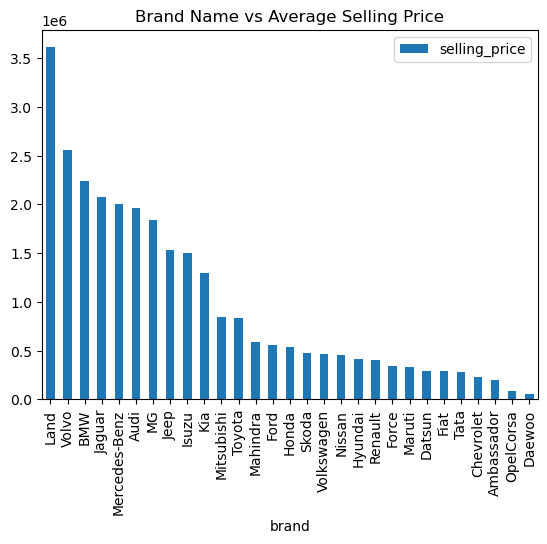

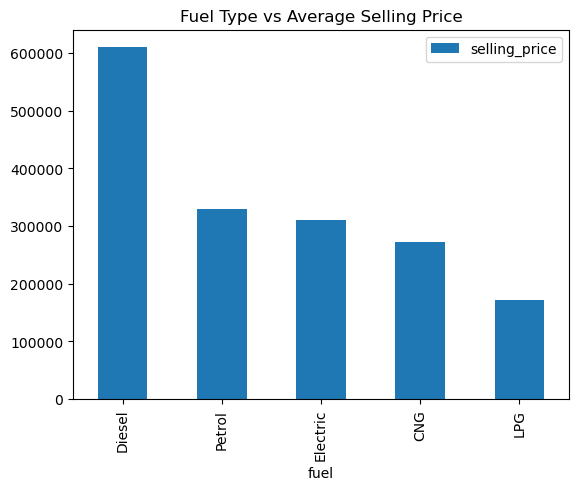

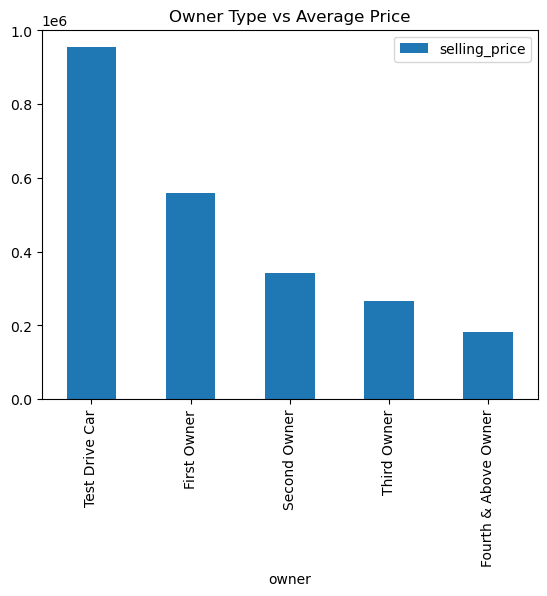

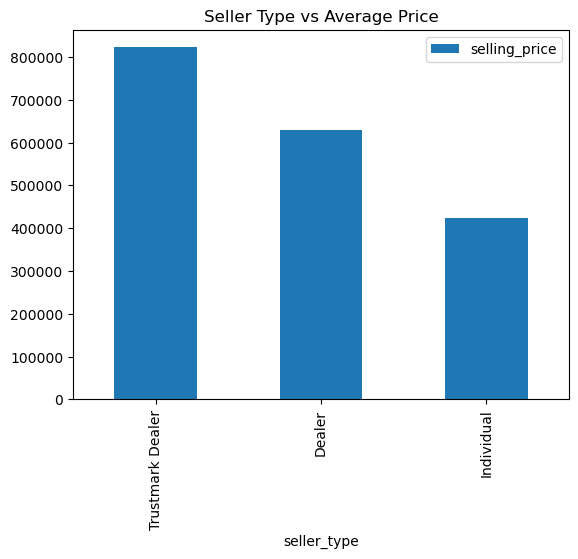

In [86]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['brand'])['selling_price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Brand Name vs Average Selling Price')
plt.show()

df = pd.DataFrame(cars.groupby(['fuel'])['selling_price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Selling Price')
plt.show()

df = pd.DataFrame(cars.groupby(['owner'])['selling_price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Owner Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['seller_type'])['selling_price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Seller Type vs Average Price')
plt.show()

#### Inference :
1. Land have highest average price.
2. Car with diesel fuel type has higher average price.
3. Test Drive car have higher average price.
4. Trustmark Dealer Selling cars at highest price.

#### Checking relationship of Year with Price

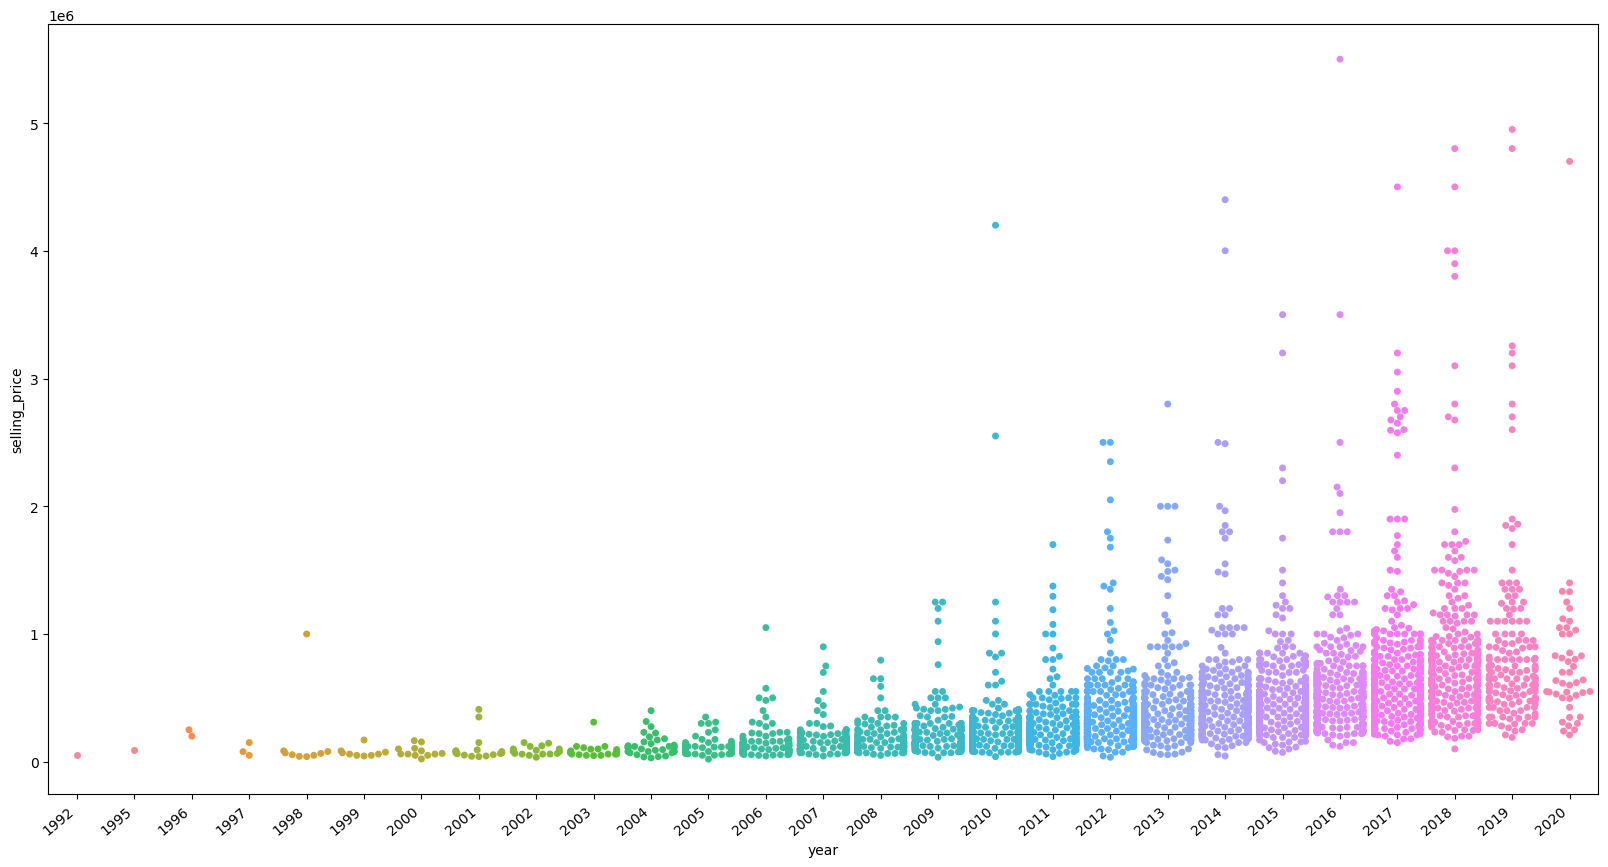

In [87]:
plt.subplots(figsize=(20,10))
ax=sns.swarmplot(x='year',y='selling_price',data=cars)
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()

#### Correlation of Km_Driven and Selling Price

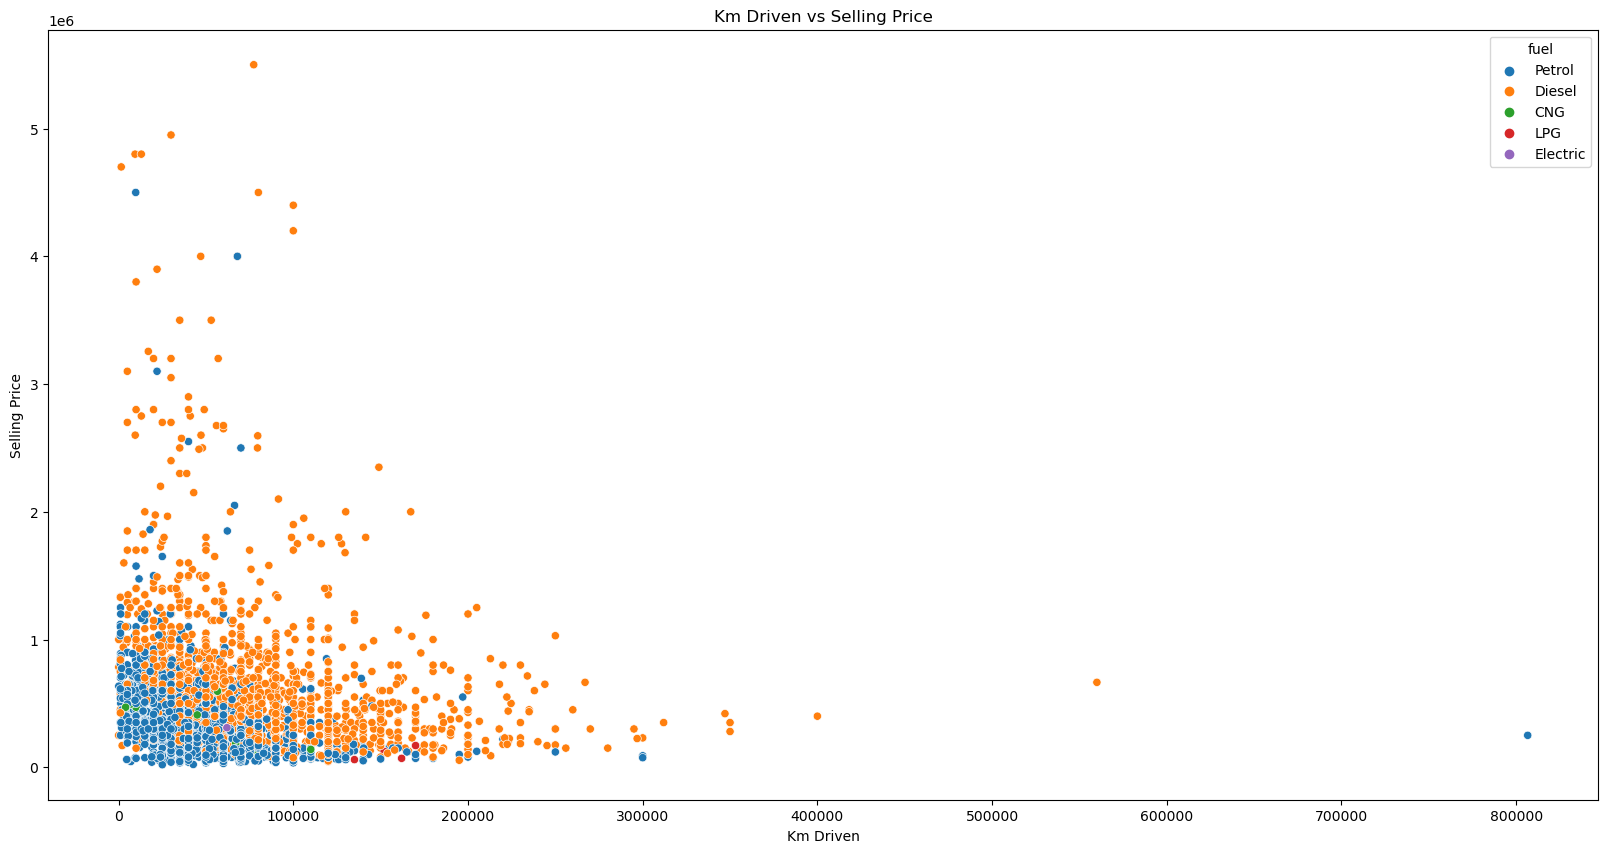

<Figure size 640x480 with 0 Axes>

In [90]:
plt.figure(figsize=(20,10))

plt.title('Km Driven vs Selling Price')
sns.scatterplot(x=cars['km_driven'],y=cars['selling_price'],hue=cars['fuel'])
plt.xlabel('Km Driven')
plt.ylabel('Selling Price')

plt.show()
plt.tight_layout()

#### Inference :
1. In this correlation we got the cars that has less km driven have high selling price.
2. mostly Diesel and Petrol fuled cars are owned.

<Figure size 2000x1000 with 0 Axes>

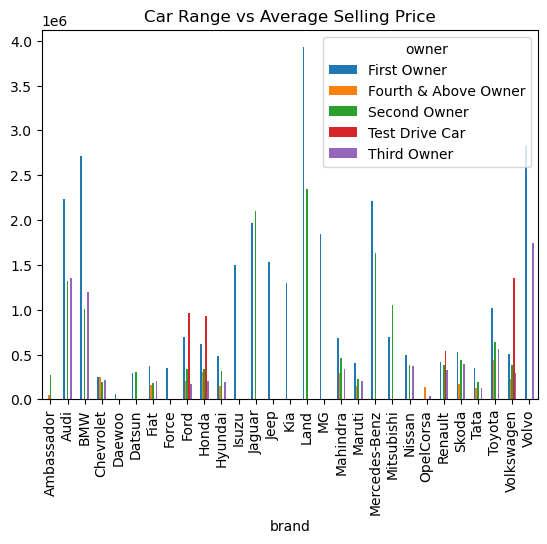

In [91]:
plt.figure(figsize=(20,10))

df = pd.DataFrame(cars.groupby(['brand','owner'])['selling_price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Selling Price')
plt.show()

#### Inference :
1. Car owned by First Owner and Test Drive Car high average selling price.

### Compute x(independent features) and y(dependent features)

In [92]:
x=cars.drop('selling_price',axis=1)
y=cars['selling_price']
print(x.shape)
print(y.shape)
print(type(x))
print(type(y))

(3575, 7)
(3575,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


#### Split data into train and test

In [93]:
from sklearn.model_selection import train_test_split

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)
print(type(x_train))
print(type(y_train))
print(type(x_test))
print(type(y_test))

(2681, 7)
(2681,)
(894, 7)
(894,)
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


#### Create function to compute MSE,MAE,Triel and test score

In [95]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [96]:
def reg_eval_matrics(ytest,ypred):
    mae=mean_absolute_error(ytest,ypred)
    mse=mean_squared_error(ytest,ypred)
    rmse=np.sqrt(mse)
    r2=r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('Rmse',rmse)
    print('R2 score',r2)
       
def mscore(model):
    print("Training Score",model.score(x_train,y_train))
    print("Testing Score",model.score(x_test,y_test))
    

#### Importing ML model libraries

In [97]:
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [98]:
x_train.dtypes

brand           object
year             int64
km_driven        int64
fuel            object
seller_type     object
transmission    object
owner           object
dtype: object

####  One Hot Encoding

In [99]:
ohe = OneHotEncoder()
ohe.fit(x[['brand','fuel', 'seller_type', 'transmission', 'owner']])

OneHotEncoder()

In [100]:
column_trans = make_column_transformer((OneHotEncoder(categories=ohe.categories_),['brand','fuel', 'seller_type', 'transmission', 'owner']),
                                      
                                      remainder='passthrough')

### LinearRegression

In [101]:
lr=LinearRegression()

pipe_lr=make_pipeline(column_trans,lr)

pipe_lr.fit(x_train,y_train)

ypred_lr=pipe_lr.predict(x_test)

reg_eval_matrics(y_test,ypred_lr)

mscore(pipe_lr)

MAE 189778.96039077733
MSE 138695031151.75586
Rmse 372417.81798372086
R2 score 0.5072047642157715
Training Score 0.5188335474968955
Testing Score 0.5072047642157715


####  Ridge Regression

In [102]:
rid=Ridge()

pipe_rid=make_pipeline(column_trans,rid)

pipe_rid.fit(x_train,y_train)

ypred_rid=pipe_rid.predict(x_test)

reg_eval_matrics(y_test,ypred_rid)

mscore(pipe_rid)

MAE 287106.42291783687
MSE 269818520540.43616
Rmse 519440.5842254109
R2 score 0.04131185995272324
Training Score 0.03315994911102915
Testing Score 0.04131185995272324


#### Lasso regression

In [103]:
la=Lasso()

pipe_la=make_pipeline(column_trans,la)

pipe_la.fit(x_train,y_train)

ypred_la=pipe_la.predict(x_test)

reg_eval_matrics(y_test,ypred_la)

mscore(pipe_la)

MAE 160369.05908510575
MSE 83869687114.8058
Rmse 289602.63658124005
R2 score 0.7020038721382345
Training Score 0.66462771076702
Testing Score 0.7020038721382345


####  Random Forest Classifire Model

In [104]:
rd=RandomForestClassifier()

pipe_rd=make_pipeline(column_trans,rd)

pipe_rd.fit(x_train,y_train)

ypred_rd=pipe_rd.predict(x_test)

reg_eval_matrics(y_test,ypred_rd)

mscore(pipe_rd)

MAE 169288.60067114094
MSE 106442318647.1264
Rmse 326254.99022563075
R2 score 0.6218013934634992
Training Score 0.8899664304364043
Testing Score 0.03691275167785235


#### Decision Tree Classifier model

In [105]:
dt=DecisionTreeClassifier()

pipe_dt=make_pipeline(column_trans,dt)

pipe_dt.fit(x_train,y_train)

ypred_dt=pipe_dt.predict(x_test)

reg_eval_matrics(y_test,ypred_dt)

mscore(pipe_dt)

MAE 181181.97539149888
MSE 121917373005.87695
Rmse 349166.6836997438
R2 score 0.5668172098329403
Training Score 0.8899664304364043
Testing Score 0.03355704697986577


#### AdaBoost Classifier

In [106]:
ad=AdaBoostClassifier()

pipe_ad=make_pipeline(column_trans,ad)

pipe_ad.fit(x_train,y_train)

ypred_ad=pipe_ad.predict(x_test)

reg_eval_matrics(y_test,ypred_ad)

mscore(pipe_ad)

MAE 263636.2438478747
MSE 309615702448.4295
Rmse 556431.2198721685
R2 score -0.10009091042077856
Training Score 0.04625139873181649
Testing Score 0.04138702460850112


### Save and Load the Model

In [107]:
import pickle

In [108]:
pickle.dump(pipe_la,open('la_model.pkl','wb'))
pickle.dump(cars,open('data.pkl','wb'))

In [109]:
cars.head(20)

,brand,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda,2014,450000,141000,Diesel,Individual,Manual,Second Owner
5,Maruti,2007,140000,125000,Petrol,Individual,Manual,First Owner
6,Hyundai,2016,550000,25000,Petrol,Individual,Manual,First Owner
7,Tata,2014,240000,60000,Petrol,Individual,Manual,Second Owner
8,Hyundai,2015,850000,25000,Petrol,Individual,Manual,First Owner
9,Maruti,2017,365000,78000,CNG,Individual,Manual,First Owner
